Практическое задание:
- взять любой набор данных для бинарной классификации (можно скачать один из модельных с https://archive.ics.uci.edu/ml/datasets.php)
- сделать обзорный анализ выбранного датасета
- сделать feature engineering
- обучить любой классификатор (какой вам нравится)
- разобраться с SHAP и построить важности признаков для:
    - всего тестового набора данных (summary_plot - дать интерпретацию)
    - для топ 10%
- для отдельных наблюдений вывести force_plot и попытаться проинтерпретировать результат

In [38]:
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
#from sklearn.feature_extraction.text import TfidfVectorizer
import itertools

import matplotlib.pyplot as plt

%matplotlib inline

In [34]:
df = pd.read_csv('C:/Users/vkhur/Desktop/Учеба/Машинное обучение в бизнесе/Lection3/train_case2.csv', ';')
features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
df.head(3)

In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1


In [35]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [36]:
#разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(df[features], df['cardio'], random_state=0)

In [39]:
model = xgboost.train({"learning_rate": 0.01}, 
                      xgboost.DMatrix(X_train, label=y_train), 100)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [42]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)

fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print(f'Best Threshold={thresholds[ix]}, F-Score={fscore[ix]:.3f}, Precision={precision[ix]:.3f}, Recall={recall[ix]:.3f}')

Best Threshold=0.38693708911473995, F-Score=0.730, Precision=0.647, Recall=0.838


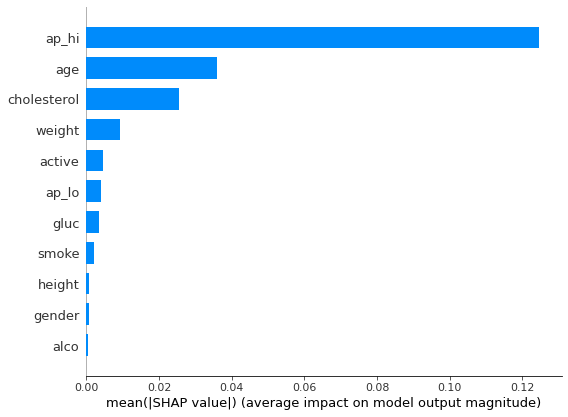

In [41]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

По даннному графику можно сделать вывод что топ 3 Важных признака для определения наличия сердечных заболеваний, являются 
1. Давление
2. Возраст
3. Холестерин 

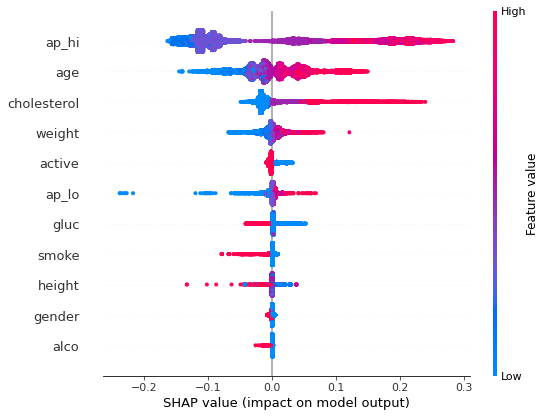

In [40]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_train)

На данном графике так же как и на предыдущем отчетливо видно значимость тех же признков в принятии решения прогноза моделью

Из графика можно сделать выводы:

1. Чем выше артериальное давление тем больше вероятность наличия заболевания.
2. чем старше человек, тем больше вероятность наличия заболевания.
3. Чем выше Холестерин тем больше вероятность наличия заболевания.
4. Чем меньше активности тем больше вероятность наличия заболевания.


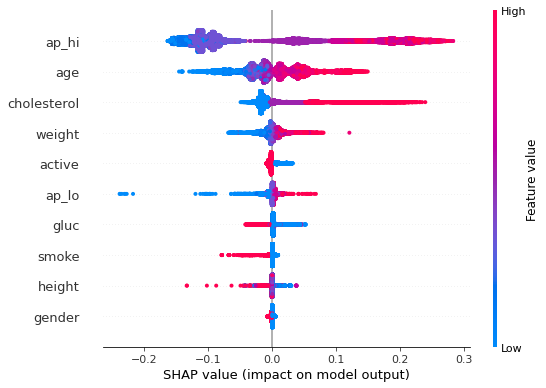

In [47]:
shap.initjs()
shap.summary_plot(shap_values, X_train, max_display=10)

Из данной выборки видно что здесь существенную роль играют теже признаки что и в во всей обучающей выборке